# Classify Fashion-MNIST with a simple CNN in Keras


### importações

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model


### base de dados

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
num_class = len(set(y_train))
print("number of classes: ", num_class)

number of classes:  10


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)  # Formato final: (60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

### estrutura do modelo

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, [3, 3], strides=2, activation="relu")(i)
x = Conv2D(64, [3, 3], strides=2, activation="relu")(x)
x = Conv2D(128, [3, 3], strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(num_class, activation="softmax")(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
### treinamento

In [ ]:
classificador = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.7468 - loss: 0.6934 - val_accuracy: 0.8536 - val_loss: 0.3980
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.8627 - loss: 0.3630 - val_accuracy: 0.8689 - val_loss: 0.3459
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.8825 - loss: 0.3123 - val_accuracy: 0.8829 - val_loss: 0.3188
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.8953 - loss: 0.2773 - val_accuracy: 0.8885 - val_loss: 0.3095
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9058 - loss: 0.2458 - val_accuracy: 0.8942 - val_loss: 0.2930
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9142 - loss: 0.2247 - val_accuracy: 0.8925 - val_loss: 0.2938
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9251 - loss: 0.2034 - val_accuracy: 0.8966 - val_loss: 0.2981
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9290 -

### checagem dos resultados

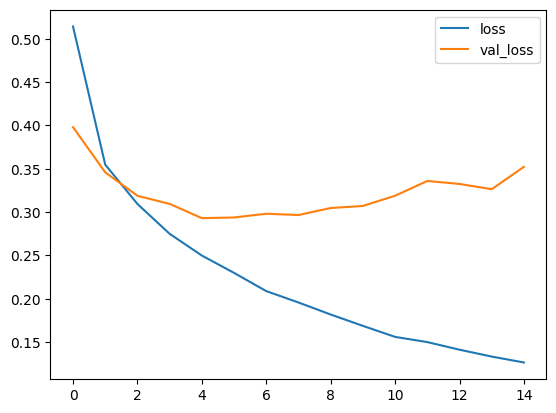

In [ ]:
plt.plot(classificador.history["loss"], label="loss")
plt.plot(classificador.history["val_loss"], label="val_loss")
plt.legend()

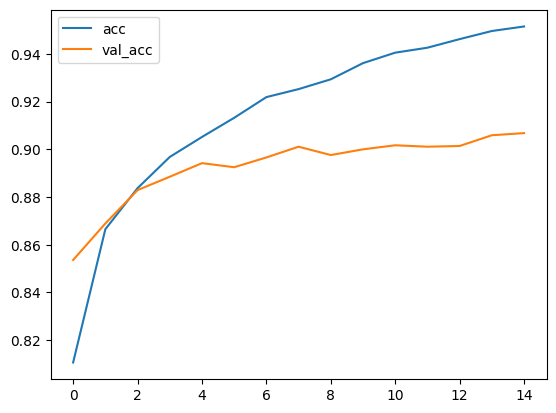

In [ ]:
plt.plot(classificador.history["accuracy"], label="acc")
plt.plot(classificador.history["val_accuracy"], label="val_acc")
plt.legend()

In [ ]:
from types import FrameType
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Confusion matrix, without normalization
[[879   2  26  21   5   2  60   0   5   0]
 [  1 980   1  11   4   0   1   0   2   0]
 [ 15   0 904   7  34   0  39   0   1   0]
 [ 14   5  23 918  27   0  13   0   0   0]
 [  0   0  89  15 844   0  51   0   1   0]
 [  1   0   0   0   0 979   0  13   0   7]
 [118   0  90  23 106   0 656   0   7   0]
 [  0   0   0   0   0  12   0 969   0  19]
 [  3   1   7   2   4   4   2   4 972   1]
 [  0   0   0   0   0   7   1  25   0 967]]


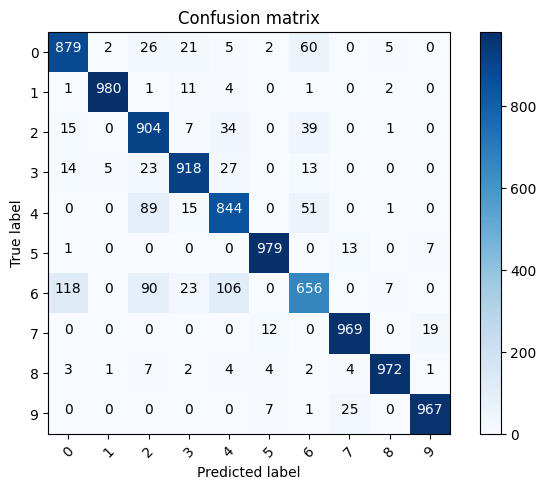

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

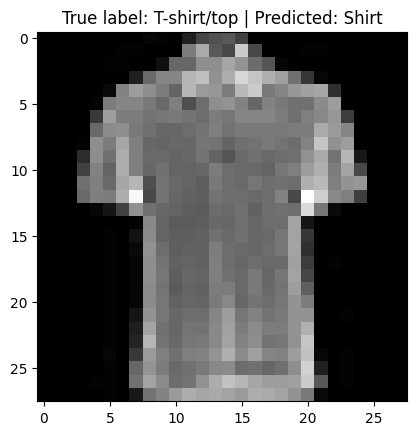

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s | Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# CNN para CIFAR-10

### importações

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

### base de dados

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [ ]:
num_classes = len(set(y_train))
print("Number of classes: ", num_classes)

Number of classes:  10


### estrutura do modelo

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(num_classes, activation="softmax")(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
classificador_cifar = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.3479 - loss: 1.7677 - val_accuracy: 0.5232 - val_loss: 1.2999
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5188 - loss: 1.3208 - val_accuracy: 0.5810 - val_loss: 1.1615
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5829 - loss: 1.1625 - val_accuracy: 0.6370 - val_loss: 1.0369
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.6247 - loss: 1.0598 - val_accuracy: 0.6516 - val_loss: 0.9868
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.6472 - loss: 0.9851 - val_accuracy: 0.6771 - val_loss: 0.9165
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6771 - loss: 0.9141 - val_accuracy: 0.6845 - val_loss: 0.9187
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6923 - loss: 0.8608 - val_accuracy: 0.6863 - val_loss: 0.9065
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.7091 -

### análise dos resultados

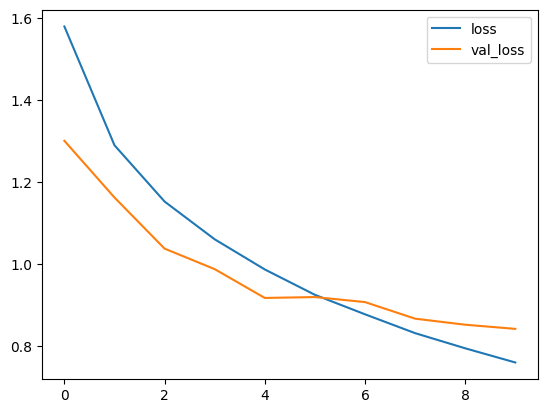

In [ ]:
plt.plot(classificador_cifar.history["loss"], label="loss")
plt.plot(classificador_cifar.history["val_loss"], label="val_loss")
plt.legend()

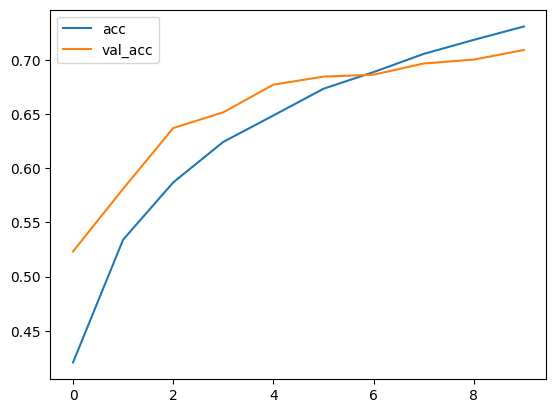

In [ ]:
plt.plot(classificador_cifar.history["accuracy"], label="acc")
plt.plot(classificador_cifar.history["val_accuracy"], label="val_acc")
plt.legend()

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")

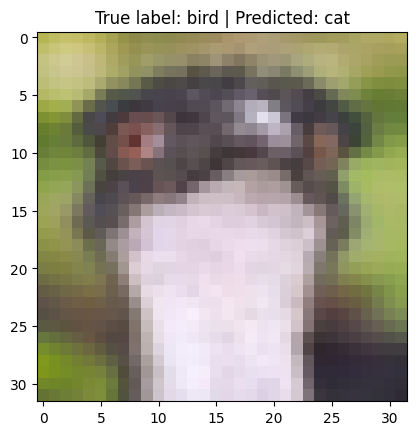

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s | Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Confusion matrix, without normalization
[[737   5  63  12  25   5  13  10  97  33]
 [ 24 766  17   4   4   8  17   3  40 117]
 [ 46   3 652  36 101  55  61  22  16   8]
 [ 18   4 115 402  89 207 111  31  15   8]
 [ 18   0 108  32 709  44  30  48  11   0]
 [ 10   2  83 139  62 602  46  38  12   6]
 [  3   1  44  28  53  20 839   3   8   1]
 [ 11   1  57  26  80  65   8 741   5   6]
 [ 51  13  15  10  11   2   9   4 864  21]
 [ 33  62  10  20  11   8  15  20  42 779]]


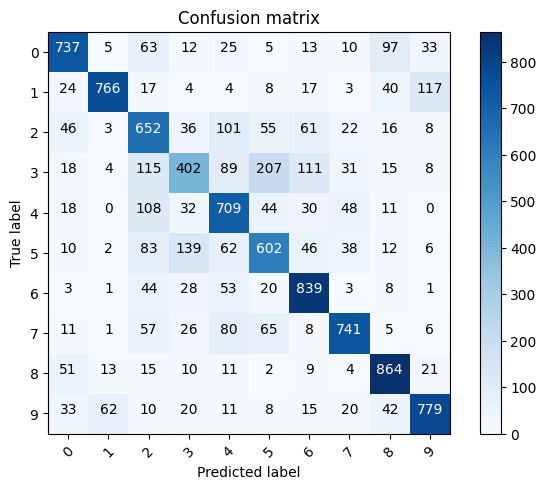

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# CIFAR Improved

# CNN para CIFAR-10

### importações

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

### base de dados

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [ ]:
num_classes = len(set(y_train))
print("Number of classes: ", num_classes)

Number of classes:  10


In [ ]:
x_train[0].shape

(32, 32, 3)

### estrutura do modelo

In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(num_classes, activation="softmax")(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
classificador_cifar = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.4415 - loss: 1.7576 - val_accuracy: 0.6318 - val_loss: 1.0510
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6918 - loss: 0.8837 - val_accuracy: 0.7143 - val_loss: 0.8324
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7541 - loss: 0.6983 - val_accuracy: 0.7315 - val_loss: 0.8067
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7997 - loss: 0.5808 - val_accuracy: 0.7763 - val_loss: 0.6750
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8326 - loss: 0.4825 - val_accuracy: 0.7800 - val_loss: 0.6678
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8571 - loss: 0.4090 - val_accuracy: 0.8062 - val_loss: 0.5998
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8861 - loss: 0.3331 - val_accuracy: 0.8100 - val_loss: 0.6064
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9025 - loss: 

### análise dos resultados

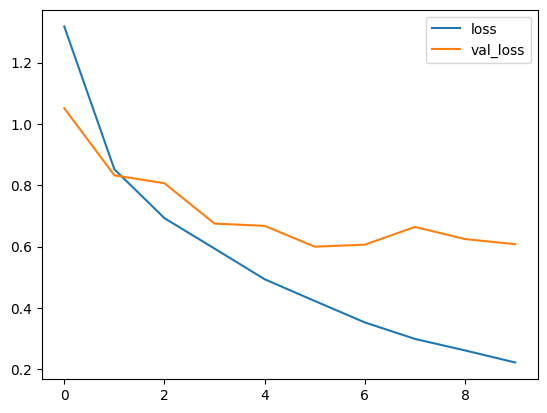

In [ ]:
plt.plot(classificador_cifar.history["loss"], label="loss")
plt.plot(classificador_cifar.history["val_loss"], label="val_loss")
plt.legend()

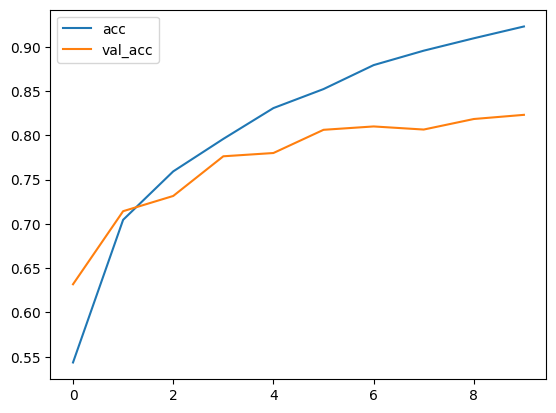

In [ ]:
plt.plot(classificador_cifar.history["accuracy"], label="acc")
plt.plot(classificador_cifar.history["val_accuracy"], label="val_acc")
plt.legend()

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")

# Text Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = [
    "Ovinho com cuscuz",
    "Como eu gosto de cafezinho com rapadura",
    "Sempre bom uma cebolinha frita"
]

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(sequences)

[[2, 1, 3], [4, 5, 6, 7, 8, 1, 9], [10, 11, 12, 13, 14]]


In [ ]:
tokenizer.word_index

{'com': 1,
 'ovinho': 2,
 'cuscuz': 3,
 'como': 4,
 'eu': 5,
 'gosto': 6,
 'de': 7,
 'cafezinho': 8,
 'rapadura': 9,
 'sempre': 10,
 'bom': 11,
 'uma': 12,
 'cebolinha': 13,
 'frita': 14}

In [ ]:
data = pad_sequences(sequences)
print(data)

[[ 0  0  0  0  2  1  3]
 [ 4  5  6  7  8  1  9]
 [ 0  0 10 11 12 13 14]]


In [ ]:
MAX_SEQUENCE_LENGTH = 7
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(data)

[[ 0  0  0  0  2  1  3]
 [ 4  5  6  7  8  1  9]
 [ 0  0 10 11 12 13 14]]


In [ ]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
print(data)

[[ 2  1  3  0  0  0  0]
 [ 4  5  6  7  8  1  9]
 [10 11 12 13 14  0  0]]


In [ ]:
data = pad_sequences(sequences, maxlen=9)
print(data)

[[ 0  0  0  0  0  0  2  1  3]
 [ 0  0  4  5  6  7  8  1  9]
 [ 0  0  0  0 10 11 12 13 14]]


In [ ]:
data = pad_sequences(sequences, maxlen=4)
print(data)

[[ 0  2  1  3]
 [ 7  8  1  9]
 [11 12 13 14]]


In [ ]:
data = pad_sequences(sequences, maxlen=5, truncating="post")
print(data)

[[ 0  0  2  1  3]
 [ 4  5  6  7  8]
 [10 11 12 13 14]]


# Text Detection CNN

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model


In [ ]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2025-03-22 16:46:29--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.007s  

2025-03-22 16:46:29 (67.5 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [ ]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.columns = ["labels", "text"]

In [ ]:
df.columns

Index(['labels', 'text'], dtype='object')

In [ ]:
df['b_label'] =df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_label'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['text'], Y, test_size=0.33)

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
word2idx = tokenizer.word_index
V = len(word2idx)

In [ ]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (3733, 189)


In [ ]:
T = data_train.shape[1]

In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [ ]:
D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
Ytest

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
r = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8441 - loss: 0.4481 - val_accuracy: 0.9190 - val_loss: 0.2132
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9639 - loss: 0.1163 - val_accuracy: 0.9712 - val_loss: 0.1023
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9943 - loss: 0.0200 - val_accuracy: 0.9766 - val_loss: 0.1016
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9975 - loss: 0.0098 - val_accuracy: 0.9810 - val_loss: 0.0882
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy: 0.9804 - val_loss: 0.1092
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9815 - val_loss: 0.0975
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9804 - val_loss: 0.1121
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accu

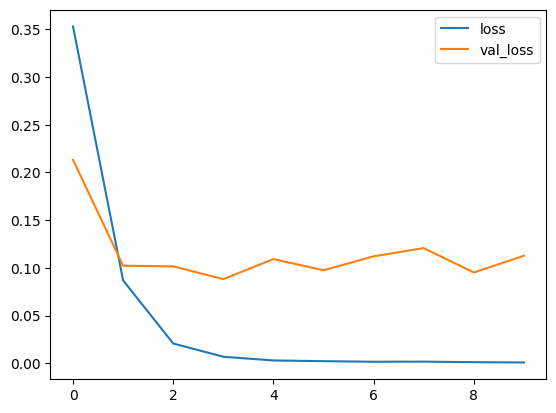

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

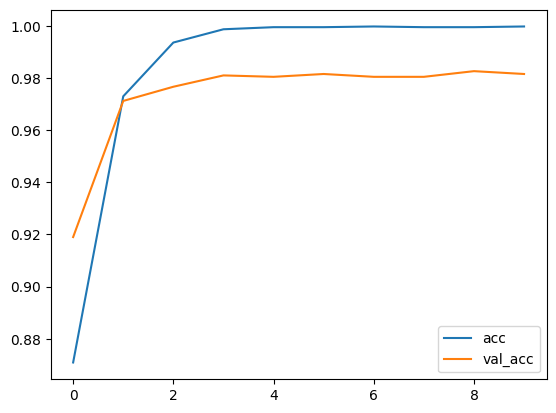

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# test
